In [ ]:
from IPython.display import HTML
HTML(f"""<video src={"url"} width=500 controls/>""")

In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [ ]:
!kaggle datasets download -d mridul18/face-detection

 97% 259M/266M [00:10<00:00, 46.1MB/s]
100% 266M/266M [00:10<00:00, 26.3MB/s]


In [ ]:
!unzip "*.zip"

In [ ]:
os.listdir("face_detection")

['not_mridul', 'mridul']

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
!wget -O "haarcascade_frontalface_default.xml" "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"

In [ ]:
import dlib
import cv2
import os
from imutils import face_utils
from PIL import Image
face_detector = dlib.get_frontal_face_detector()   
def face_finder(image_link):
  img=cv2.imread(image_link)
  frame = img
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  rects = face_detector(gray,0)
  data=[]
  for rect in rects:
    (x1,y1,x2,y2) = face_utils.rect_to_bb(rect) 
    data.append([x1,y1,x2,y2])
  return face_cropper(image_link,data)
def face_cropper(image_link,rects):
  cropped_images=[]
  for rect in rects:
    my_image=Image.open(image_link)
    x1=rect[0]
    y1=rect[1]
    x2=rect[2]
    y2=rect[3]
    cropped_images.append(my_image.crop((x1,y1,x1+x2,y1+y2)))
  return cropped_images

In [ ]:
path=Path("face_detection")
classes=['mridul','not_mridul']
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)



mridul


not_mridul


In [ ]:
classes=['mridul','not_mridul']
for c in classes:
    for path,dirs,files in os.walk('/content/face_detection/'+c):
      print(files)
      onlyfiles=files
      dirr='/content/face_detection/'+c
      for filename in onlyfiles:
         if(filename.endswith('.jpg')):
           path=os.path.join(dirr,filename)
           img1=open_image(path)
           try:
              img= face_finder(path)
              img1=img[0]
              img1.save(path)
           except:
             pass

['img (22).jpg', 'img (72).jpg', 'img (134).jpg', 'img (2).jpg', 'img (190).jpg', 'img (24).jpg', 'img (126).jpg', 'img (105).jpg', 'img (130).jpg', 'img (57).jpg', 'img (62).jpg', 'img (46).jpg', 'img (6).jpg', 'img (239).jpg', 'img (201).jpg', 'img (38).jpg', 'img (263).jpg', 'img (173).jpg', 'img (59).jpg', 'img (136).jpg', 'img (5).jpg', 'img (220).jpg', 'img (54).jpg', 'img (264).jpg', 'img (171).jpg', 'img (35).jpg', 'img (266).jpg', 'img (73).jpg', 'img (225).jpg', 'img (218).jpg', 'img (189).jpg', 'img (26).jpg', 'img (141).jpg', 'img (145).jpg', 'img (187).jpg', 'img (241).jpg', 'img (124).jpg', 'img (251).jpg', 'img (253).jpg', 'img (144).jpg', 'img (270).jpg', 'img (53).jpg', 'img (99).jpg', 'img (248).jpg', 'img (215).jpg', 'img (286).jpg', 'img (1).jpg', 'img (162).jpg', 'img (118).jpg', 'img (273).jpg', 'img (65).jpg', 'img (202).jpg', 'img (143).jpg', 'img (8).jpg', 'img (208).jpg', 'img (258).jpg', 'img (15).jpg', 'img (103).jpg', 'img (231).jpg', 'img (147).jpg', 'img 

In [ ]:
bs=4
path=""
tfms = get_transforms()
data = ImageDataBunch.from_folder( Path("face_detection"), valid_pct=0.2, bs=4, size=224, ds_tfms=get_transforms())

In [ ]:
resnet_learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [ ]:
resnet_learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.044418,0.005930,0.998162,02:48
1,0.073981,0.000010,1.000000,02:47
2,0.009306,0.000038,1.000000,02:46
3,0.008531,0.000001,1.000000,02:47


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
os.makedirs("/content/drive/My Drive/dl_projects/FaceRecognition",exist_ok=True)

In [ ]:
my_dir="/content/drive/My Drive/dl_projects/FaceRecognition"

In [ ]:
resnet_learn.save(my_dir+"/resnet_Stage-1")

In [ ]:
resnet_learn.export(my_dir+"/export.pkl")

In [ ]:
!pip install -U kora
from kora.drive import upload_public

In [ ]:
url = upload_public('/content/drive/My Drive/dl_projects/FaceRecognition/export.pkl')
url

'https://drive.google.com/uc?id=1KGF2fAR9IDRDffhMYx6YcNcE7hjXUys2'

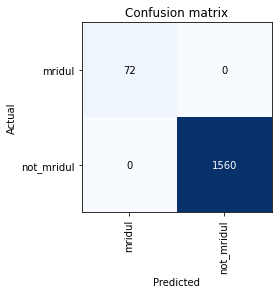

In [ ]:
interpretation = ClassificationInterpretation.from_learner(resnet_learn)
interpretation.plot_confusion_matrix()